In [173]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [174]:
df = pd.read_csv('Loan.csv')

In [175]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


### preprocessing

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [177]:
df.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [178]:
#dropping null values
df.dropna(inplace = True)
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [179]:
df.sample(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
148,LP001798,Male,Yes,2,Graduate,No,5819,5000.0,120.0,360.0,1.0,Rural,Y
179,LP001925,Female,No,0,Graduate,Yes,2600,1717.0,99.0,300.0,1.0,Semiurban,N
238,LP002225,Male,Yes,2,Graduate,No,5391,0.0,130.0,360.0,1.0,Urban,Y
156,LP001825,Male,Yes,0,Graduate,No,1809,1868.0,90.0,360.0,1.0,Urban,Y
19,LP001086,Male,No,0,Not Graduate,No,1442,0.0,35.0,360.0,1.0,Urban,N
251,LP002281,Male,Yes,0,Graduate,No,3033,1459.0,95.0,360.0,1.0,Urban,Y
323,LP002643,Male,Yes,2,Graduate,No,3283,2035.0,148.0,360.0,1.0,Urban,Y
117,LP001664,Male,No,0,Graduate,No,4191,0.0,120.0,360.0,1.0,Rural,Y
211,LP002098,Male,No,0,Graduate,No,2935,0.0,98.0,360.0,1.0,Semiurban,Y
372,LP002928,Male,Yes,0,Graduate,No,3000,3416.0,56.0,180.0,1.0,Semiurban,Y


In [180]:
df.shape

(308, 13)

### Analysis

In [13]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,308.000000,308.000000,308.000000,308.000000,308.000000
mean,3599.126623,1278.434805,104.623377,341.181818,0.853896
std,1462.359612,2520.961308,29.382256,68.246006,0.353785
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2568.750000,0.000000,89.750000,360.000000,1.000000
50%,3329.500000,871.500000,110.000000,360.000000,1.000000
75%,4291.000000,1953.500000,128.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


#### Gender

In [24]:
result = df.groupby('Gender', as_index=False)['LoanAmount'].sum().sort_values(by='LoanAmount', ascending =False)
result

,Gender,LoanAmount
1,Male,26023.0
0,Female,6201.0


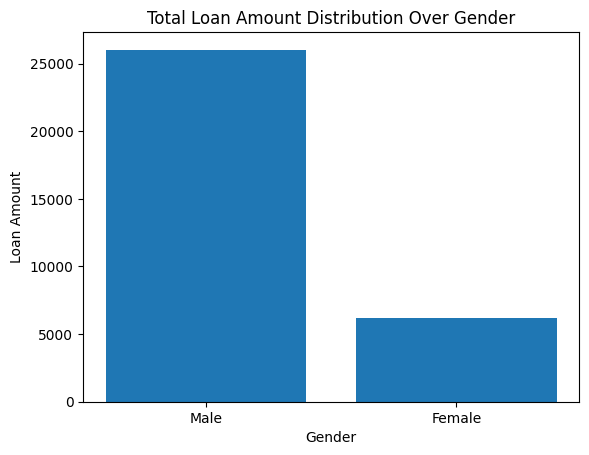

In [27]:
plt.bar(x=result['Gender'] , height=result['LoanAmount'])
plt.xlabel('Gender')
plt.ylabel('Loan Amount')
plt.title('Total Loan Amount Distribution Over Gender')
plt.show()

In [29]:
result = df.groupby('Gender', as_index=False)['LoanAmount'].count().sort_values(by='LoanAmount', ascending =False)
result

,Gender,LoanAmount
1,Male,245
0,Female,63


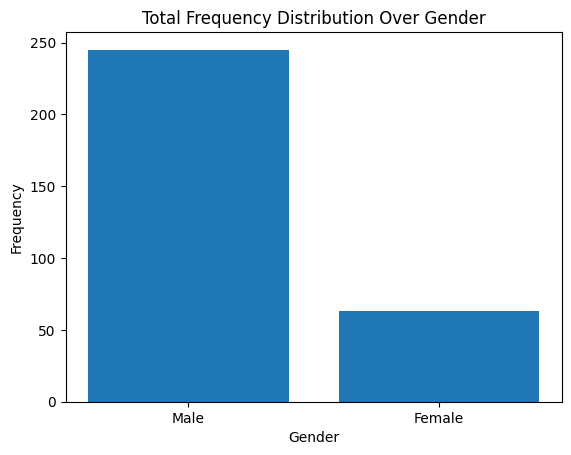

In [31]:
plt.bar(x=result['Gender'] , height=result['LoanAmount'])
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Total Frequency Distribution Over Gender')
plt.show()

From the above findings, Males are more in numbers than Females when applying for Loan

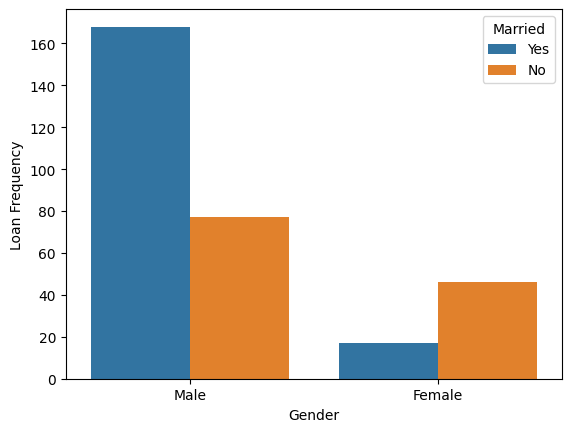

In [88]:
sns.countplot(x='Gender', hue = 'Married',data = df)
plt.ylabel('Loan Frequency')
plt.show()

In [150]:
result = df.groupby(['Gender','Married'], as_index = False)['LoanAmount'].sum().sort_values(by='LoanAmount' , ascending = False)
result

,Gender,Married,LoanAmount
3,Male,Yes,18224.0
2,Male,No,7799.0
0,Female,No,4284.0
1,Female,Yes,1917.0


<Axes: xlabel='Gender', ylabel='LoanAmount'>

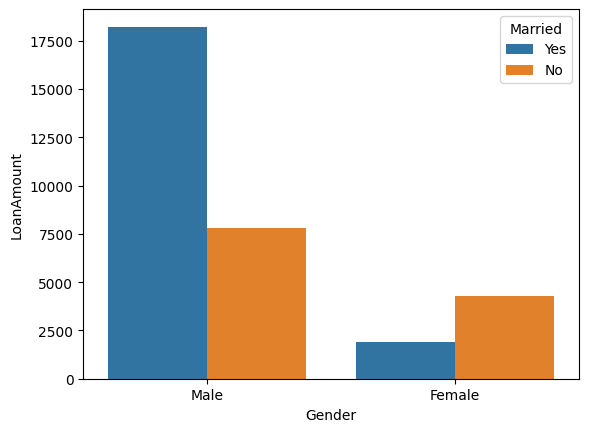

In [151]:
sns.barplot(x='Gender' , y = 'LoanAmount' , hue = 'Married' , data = result)

#### Property Area

In [107]:
result = df.groupby('Property_Area',as_index=False).count()[['Property_Area' , 'Loan_ID']]
result['Percentage'] = (result['Loan_ID'] / result['Loan_ID'].sum()) * 100
result

,Property_Area,Loan_ID,Percentage
0,Rural,86,27.922078
1,Semiurban,123,39.935065
2,Urban,99,32.142857


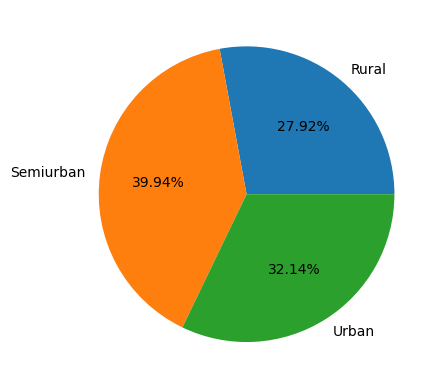

In [108]:
plt.pie(x=result['Percentage'] , labels= result['Property_Area'],  autopct='%1.2f%%')
plt.show()

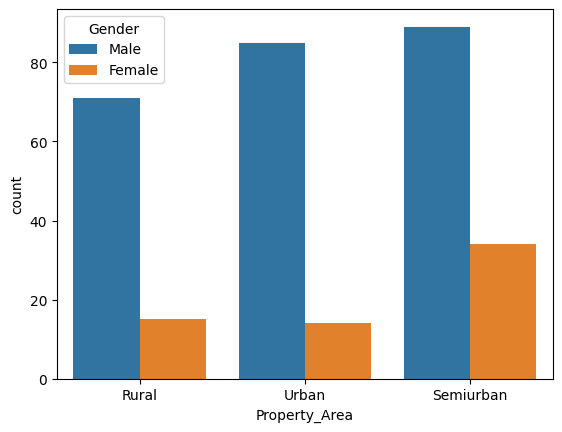

In [143]:
sns.countplot(x='Property_Area', hue='Gender' , data = df)
plt.show()

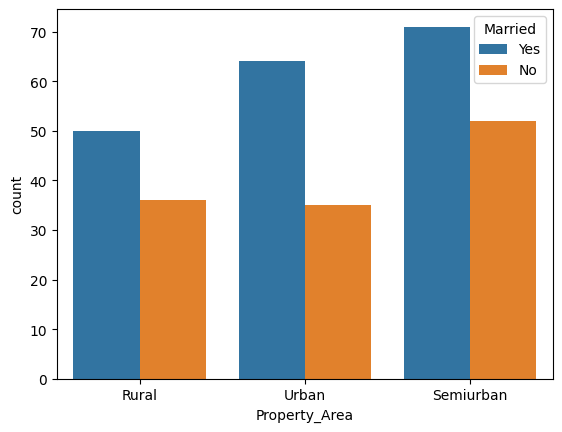

In [145]:
sns.countplot(x='Property_Area', hue='Married' , data = df)
plt.show()

Married Males from Semiurban Areas are more in frequency when applying

#### Education

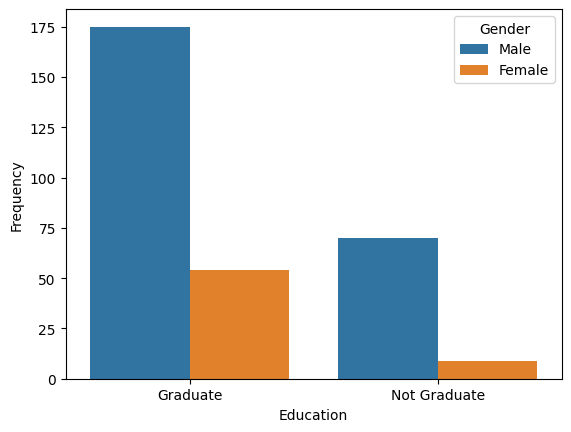

In [119]:
sns.countplot(x='Education', hue='Gender' , data = df)
plt.ylabel('Frequency')
plt.show()

Findings suggest that there is a very high number of Graduate Males who have applied for the Loan

#### Loan Status

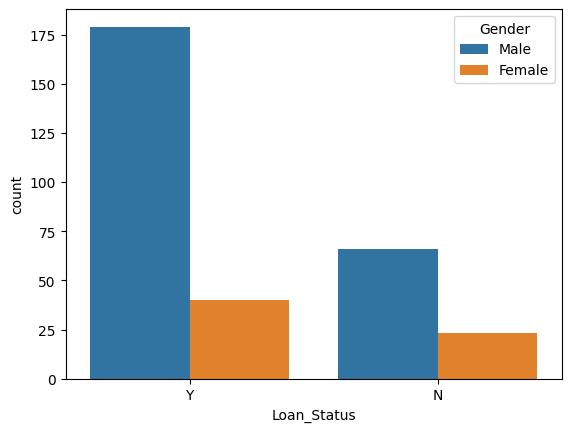

In [148]:
sns.countplot(x='Loan_Status' , hue = 'Gender' , data = df , order = df['Loan_Status'].value_counts().index)
plt.show()

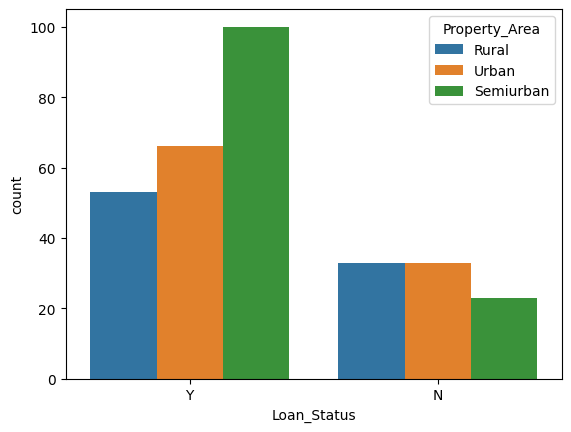

In [147]:
sns.countplot(x='Loan_Status' , hue = 'Property_Area' , data = df , order = df['Loan_Status'].value_counts().index)
plt.show()

The number of male applicants for loans is higher than that of females, with males from semi-urban areas contributing the most

#### Applicant Income

In [184]:
result = df.groupby(['ApplicantIncome'])[['Gender' , 'Married']].count()
result

,Gender,Married
ApplicantIncome,,
150,1,1
645,1,1
1000,1,1
1025,1,1
1299,1,1
...,...,...
7740,1,1
8624,1,1
8750,1,1


In [193]:
df['ApplicantIncome'].max()

9703

In [208]:
df['IncomeGroup'] = ''
bins = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]

labels = ['Below 1000', '1000 - 2000', '2000 - 3000', '3000 - 4000', '4000 - 5000','5000 - 6000','6000 - 7000',
          '7000 - 8000','8000 - 9000','9000 - 10000']

# bins = [0, 1000, 2000, 3000, 4000, 5000,6000,7000,8000,9000,10000, float('inf')]



In [209]:
df['IncomeGroup'] = pd.cut(df['ApplicantIncome'], bins=bins, labels=labels, right=False)


In [210]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,IncomeGroup
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,4000 - 5000
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000 - 4000
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,2000 - 3000
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000 - 7000
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y,2000 - 3000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y,5000 - 6000
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y,3000 - 4000
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2000 - 3000
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,4000 - 5000


In [220]:
result = df.groupby('IncomeGroup',as_index = False)['Loan_ID'].count()
result

,IncomeGroup,Loan_ID
0,Below 1000,2
1,1000 - 2000,24
2,2000 - 3000,89
3,3000 - 4000,99
4,4000 - 5000,52
5,5000 - 6000,18
6,6000 - 7000,13
7,7000 - 8000,7
8,8000 - 9000,2
9,9000 - 10000,2


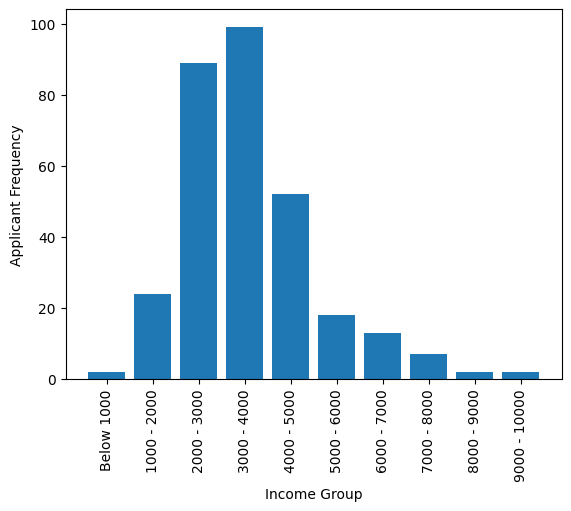

In [234]:
plt.bar(x=result['IncomeGroup'] , height = result['Loan_ID'] )
plt.xticks(rotation=90)
plt.xlabel('Income Group')
plt.ylabel('Applicant Frequency')

plt.show()

Findings suggest that Applicants with an income from 2000 to 4000 have the higher freqeunce of applying for Loan

### Conclusion

Based on the findings, it's evident that there is a higher frequency of male applicants for loans, especially among married individuals residing in semi-urban areas. Additionally, there is a notable prevalence of male applicants who are graduates. Moreover, applicants with incomes ranging from 2000 to 4000 exhibit a higher frequency of applying for loans. These insights highlight the demographic trends and income brackets associated with loan applicants, emphasizing the predominance of males, particularly from semi-urban areas, in the applicant pool.